### Imports

In [10]:
import joblib
import matplotlib.pyplot as plt

### Ouverture du fichier résultats

In [2]:
results = joblib.load("results.joblib")

### Analyse

Pour chaque langue, quels sont les modèles les plus performants sur le fichier de meilleur qualité ?

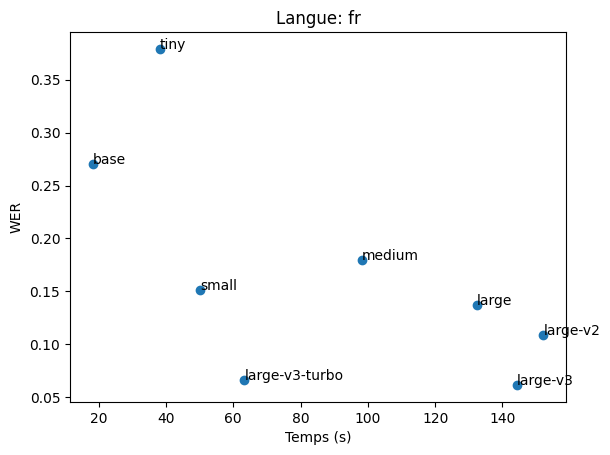

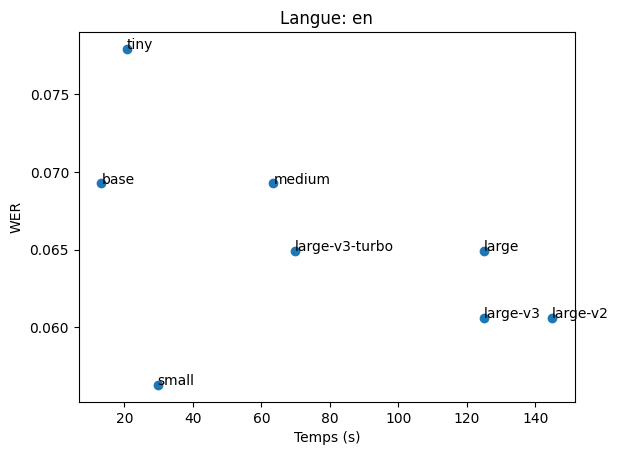

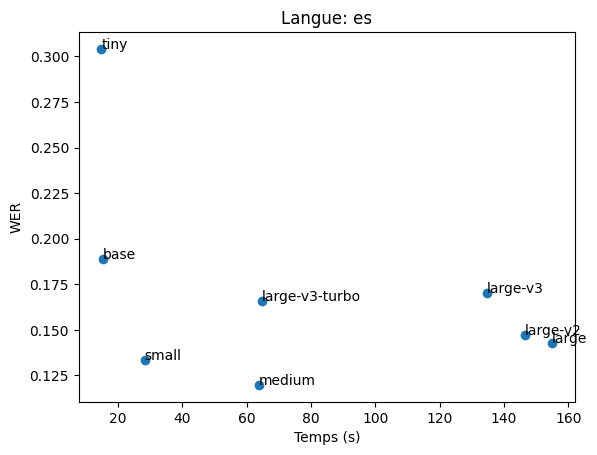

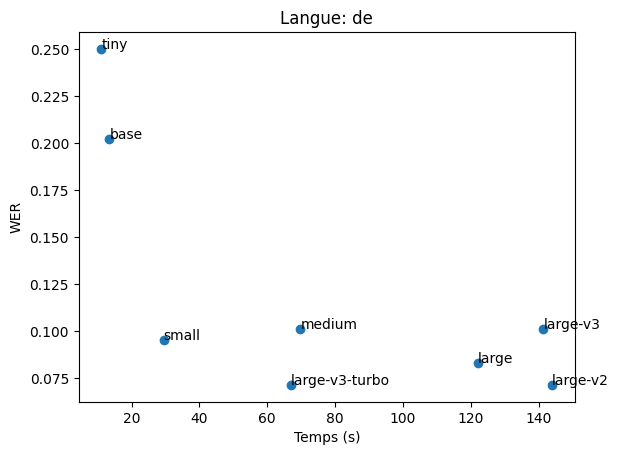

In [13]:
for lang in results:
    x_vals, y_vals, labels = [], [], []
    for model in results[lang]:
        for fic_ in results[lang][model]:
            if "_0_" in fic_.name:
                x_vals.append(results[lang][model][fic_]["time_s"])
                y_vals.append(results[lang][model][fic_]["wer"])
                labels.append(model.split("-", maxsplit=1)[1])
    plt.figure()
    plt.scatter(x_vals, y_vals)
    for i, lbl in enumerate(labels):
        plt.annotate(lbl, (x_vals[i], y_vals[i]))
    plt.xlabel("Temps (s)")
    plt.ylabel("WER")
    plt.title(f"Langue: {lang}")
    plt.show()

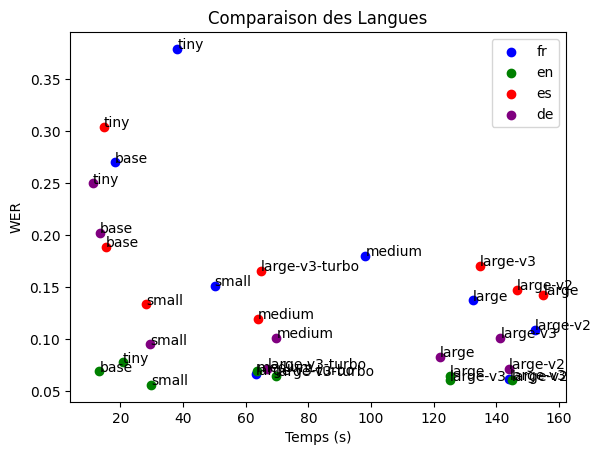

In [14]:
colors = {"fr": "blue", "en": "green", "es": "red", "de": "purple"}

plt.figure()
for lang in results:
    x_vals, y_vals, labels = [], [], []
    for model in results[lang]:
        for fic_ in results[lang][model]:
            if "_0_" in fic_.name:
                x_vals.append(results[lang][model][fic_]["time_s"])
                y_vals.append(results[lang][model][fic_]["wer"])
                labels.append(model.split("-", maxsplit=1)[1])
    plt.scatter(x_vals, y_vals, color=colors.get(lang, "black"), label=lang)
    for i, lbl in enumerate(labels):
        plt.annotate(lbl, (x_vals[i], y_vals[i]))
plt.xlabel("Temps (s)")
plt.ylabel("WER")
plt.title("Comparaison des Langues")
plt.legend()
plt.show()

Conclusion de ces deux premières séries de graphiques : sur un fichier audio qualitatif, en anglais, le modèle small est le meilleur.

### Etude des audios dégradés

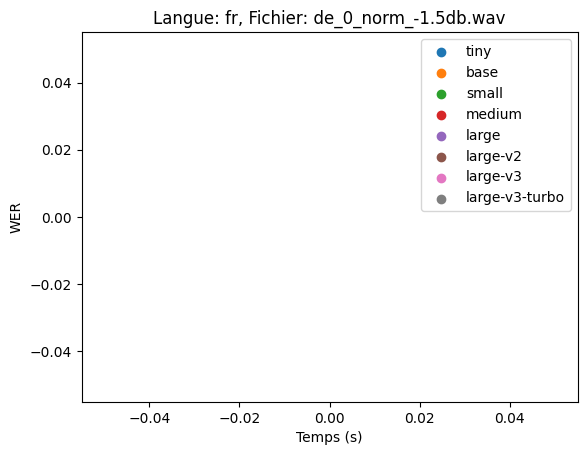

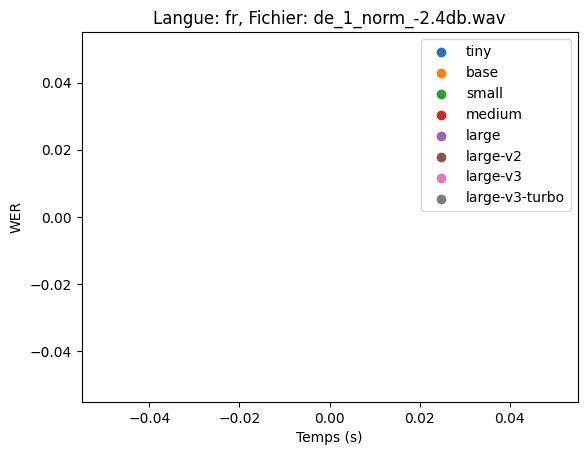

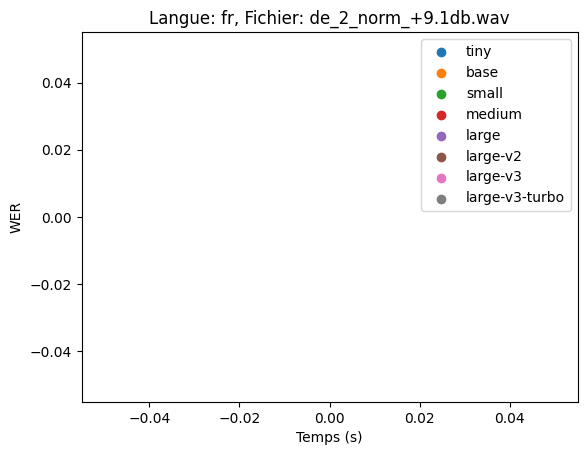

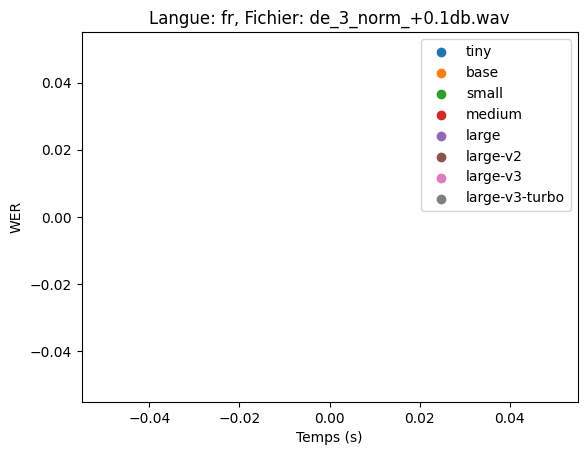

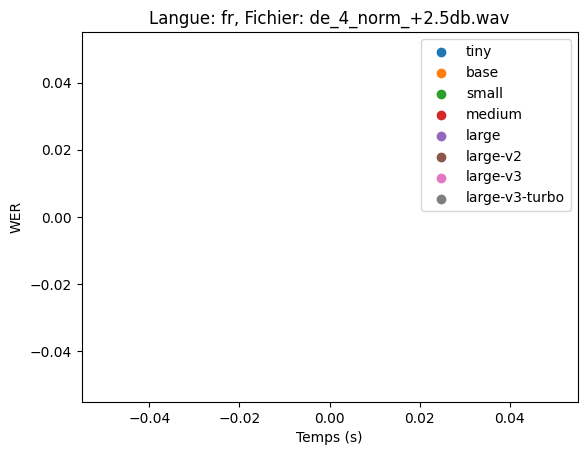

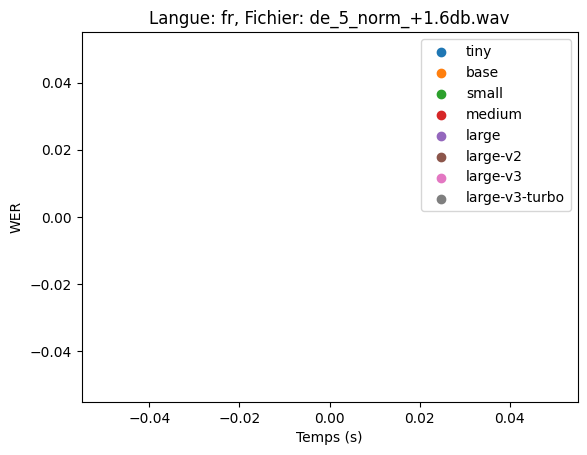

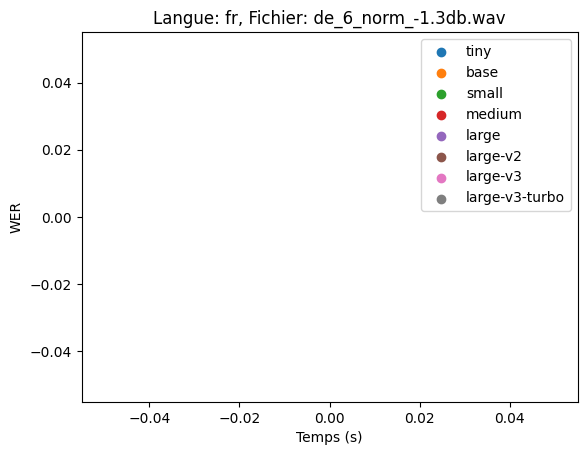

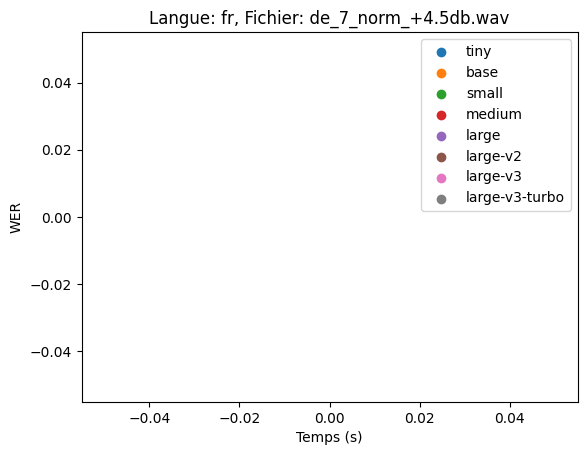

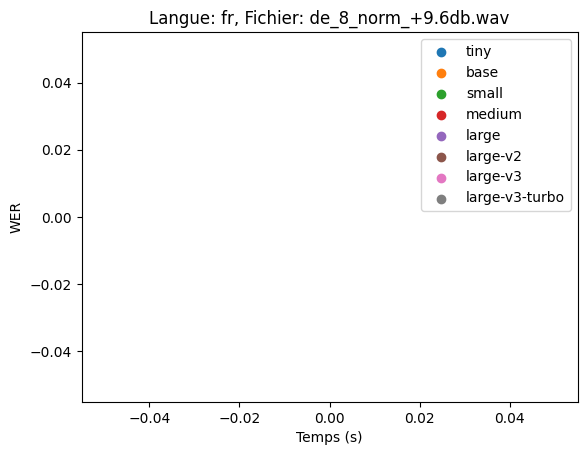

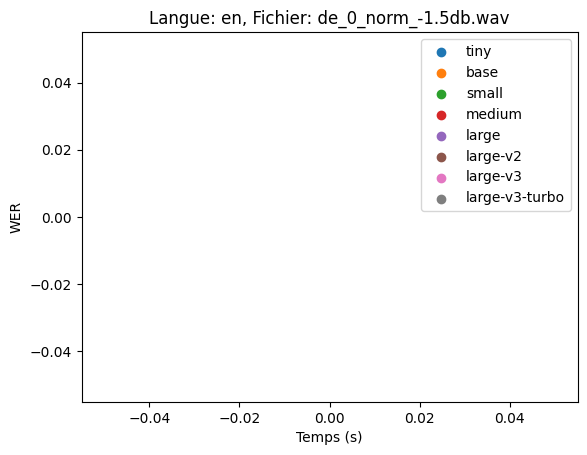

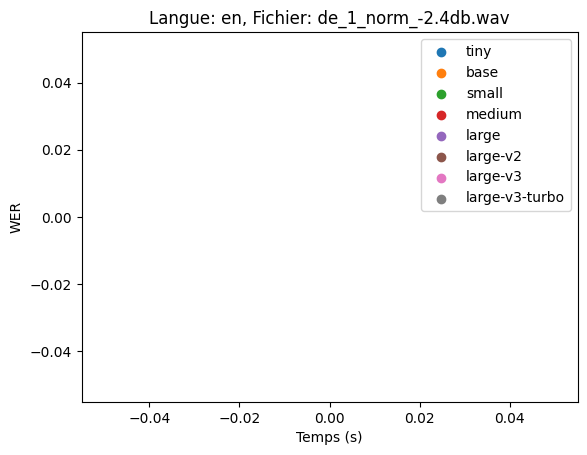

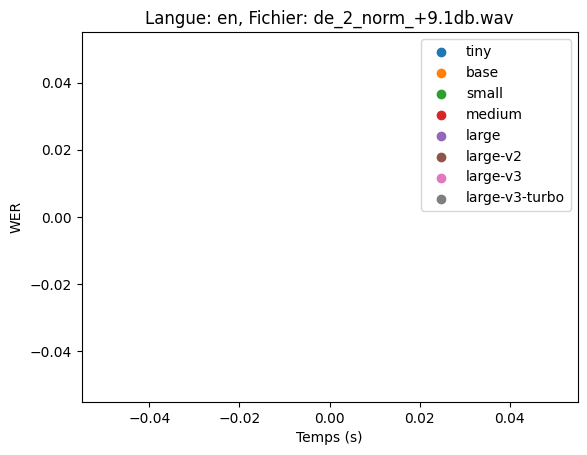

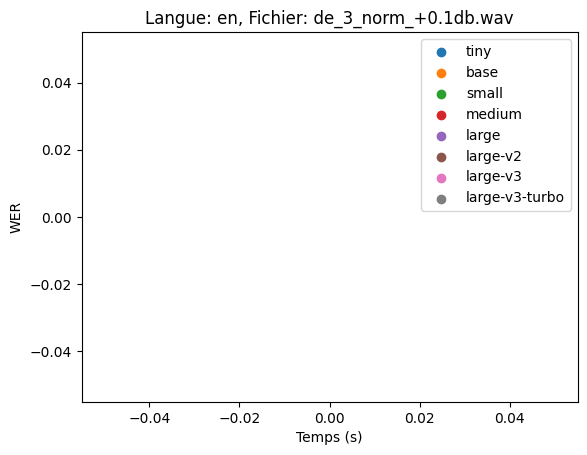

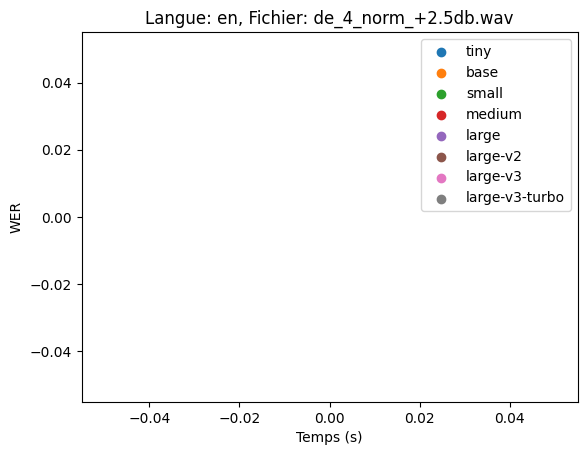

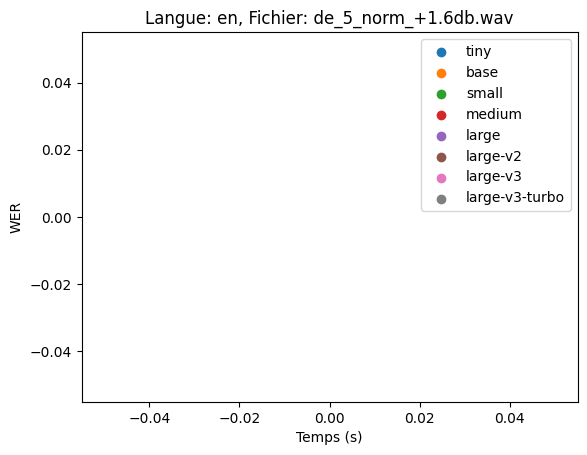

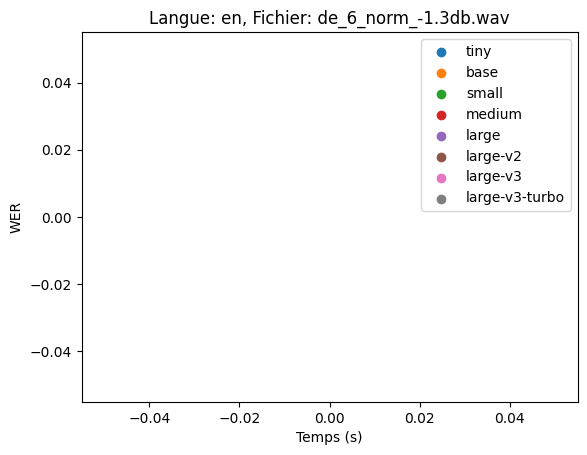

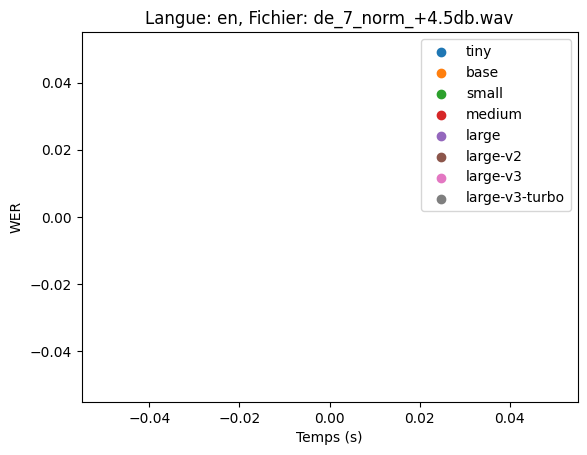

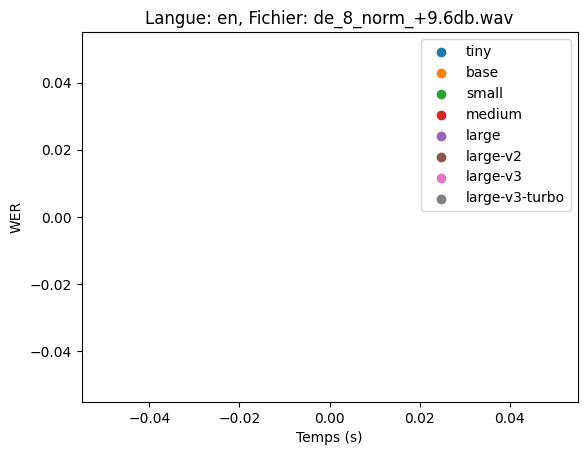

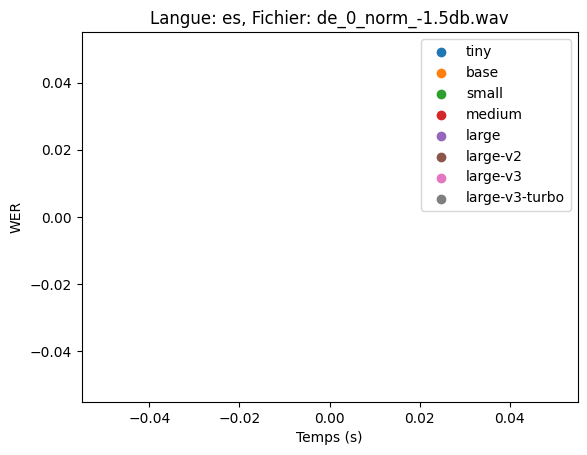

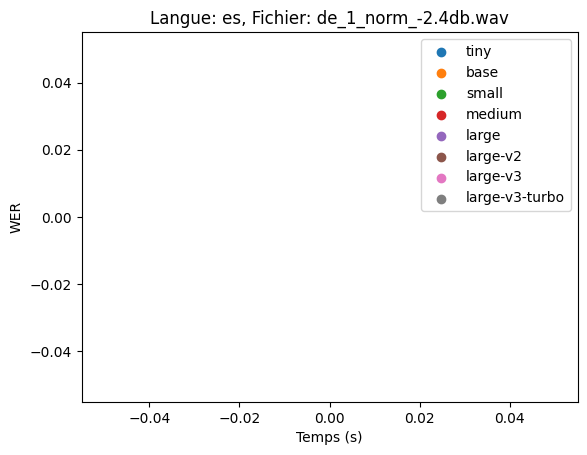

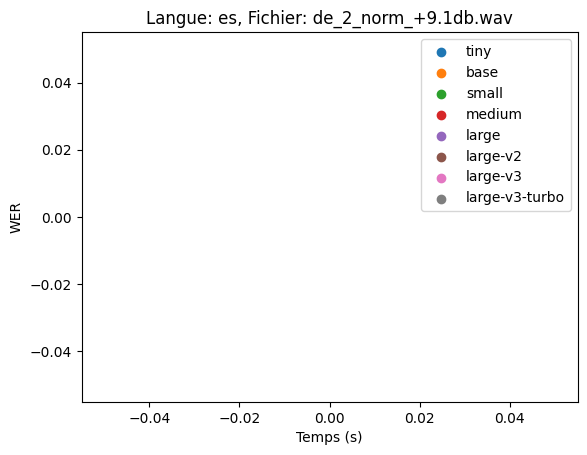

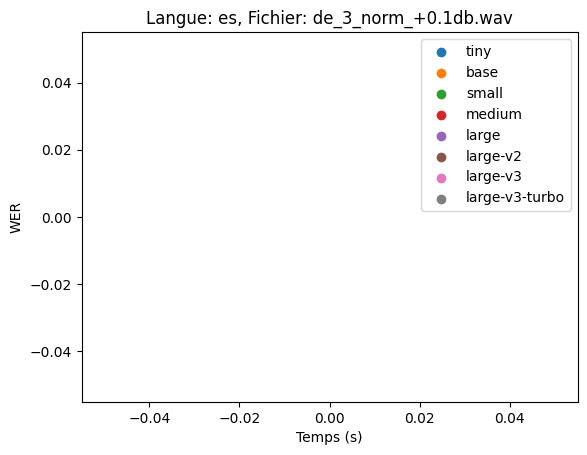

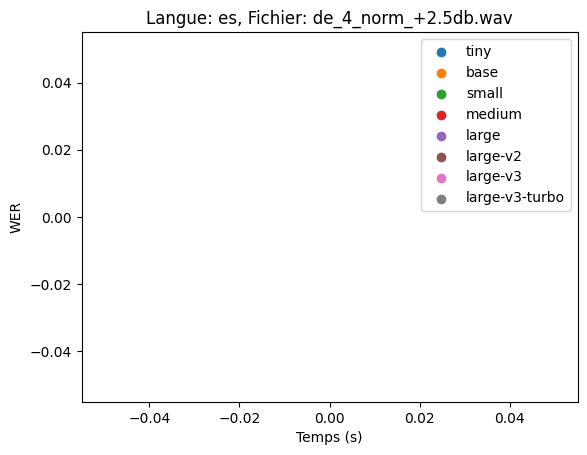

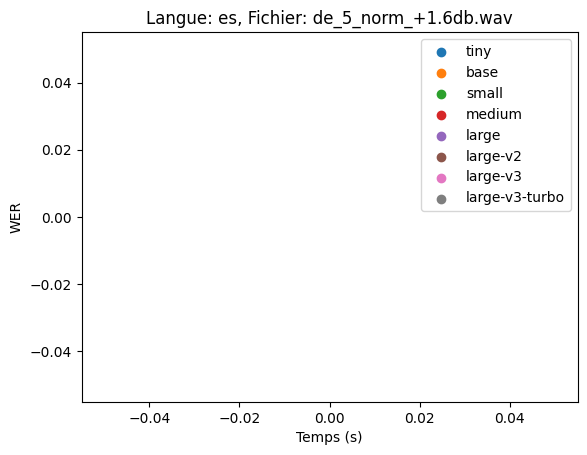

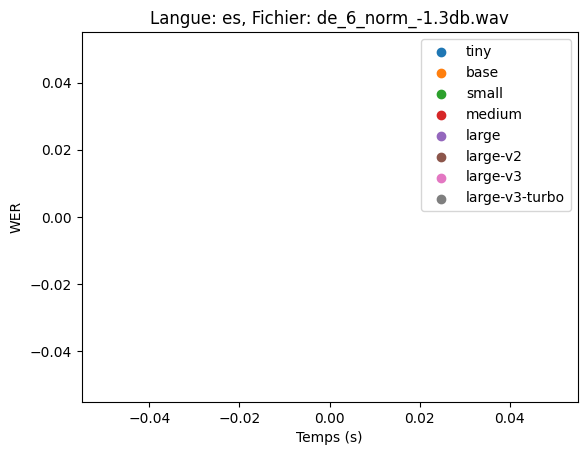

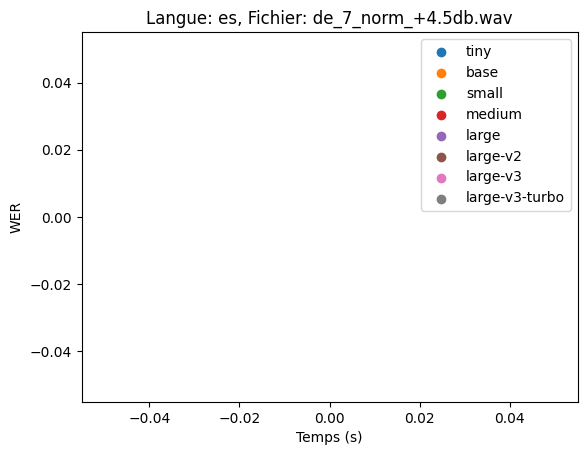

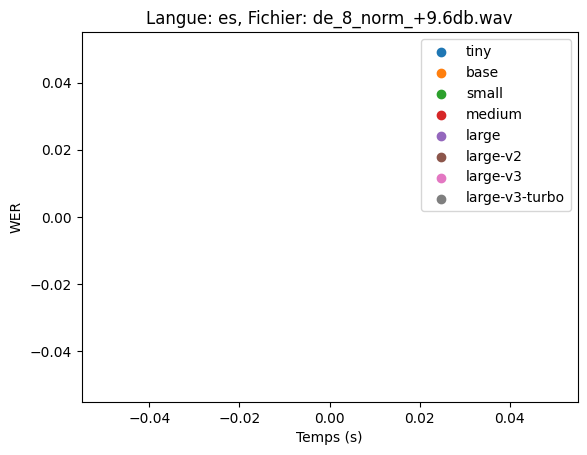

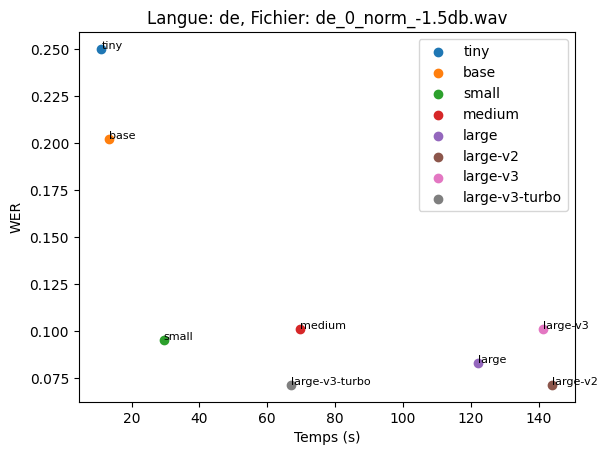

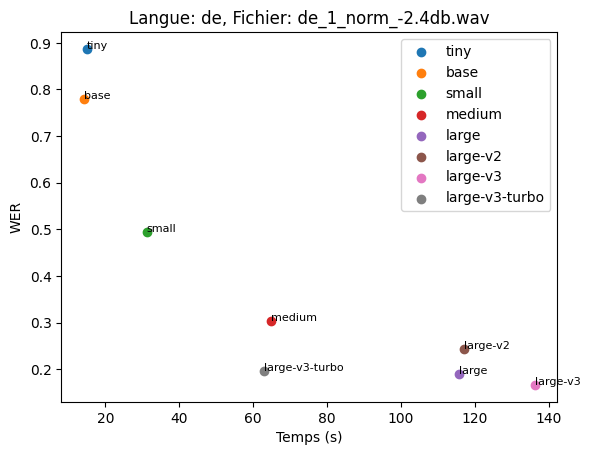

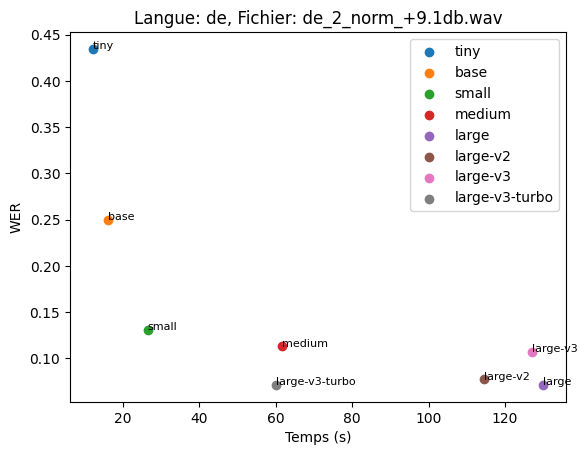

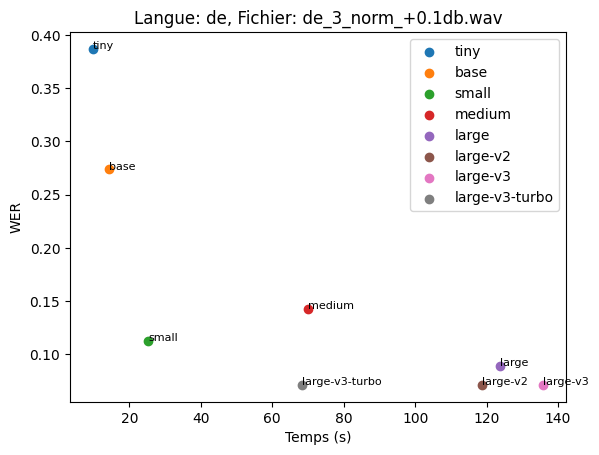

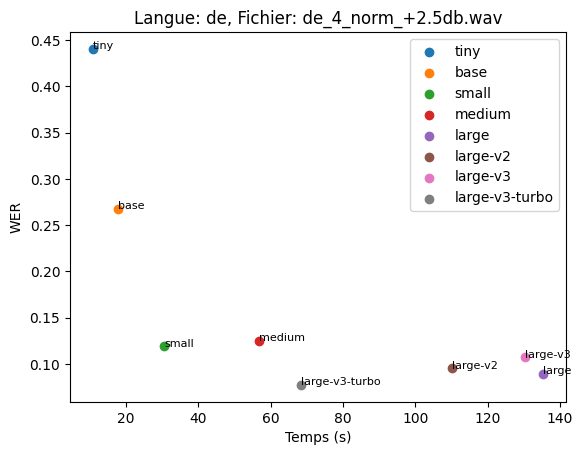

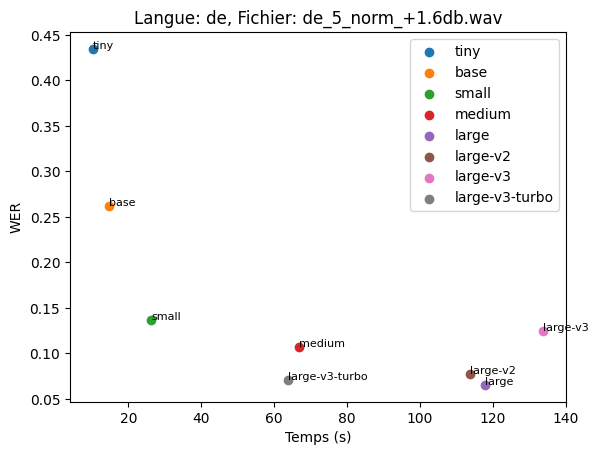

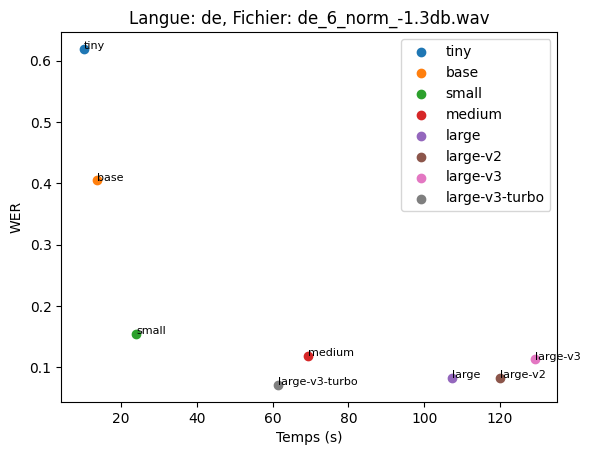

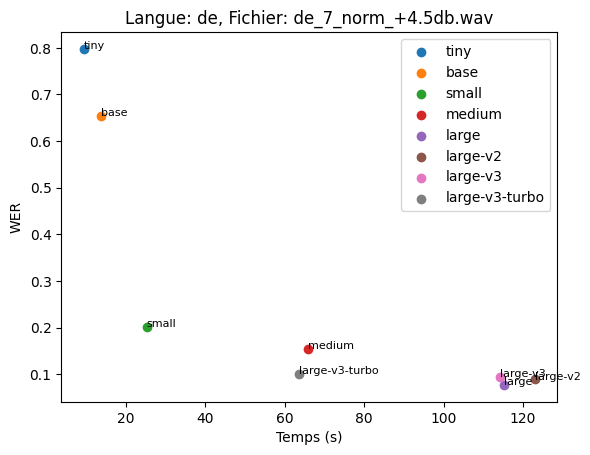

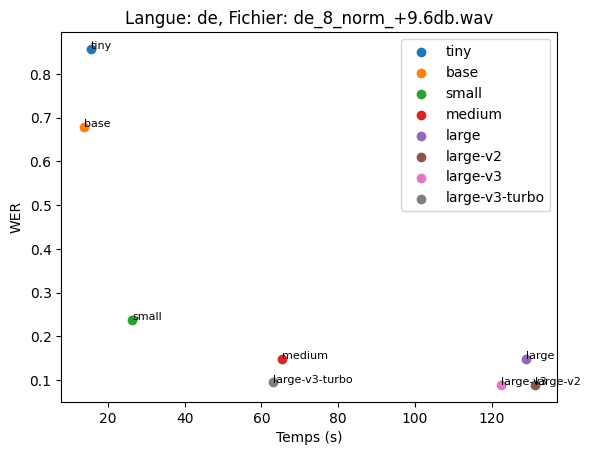

In [19]:
# Pour une même langue et un même modèle, tracer un graphique WER en fonction du temps et du fichier audio
for lang in results:
    for fic_ in labels:
        plt.figure()
        for model in results[lang]:
            x_vals, y_vals = [], []
            for fic in results[lang][model]:
                if fic_ == fic.name:
                    x_vals.append(results[lang][model][fic]["time_s"])
                    y_vals.append(results[lang][model][fic]["wer"])
            plt.scatter(x_vals, y_vals, label=model.split("-", maxsplit=1)[1])
            for i, (x, y) in enumerate(zip(x_vals, y_vals)):
                plt.annotate(model.split("-", maxsplit=1)[1], (x, y), fontsize=8)
        plt.xlabel("Temps (s)")
        plt.ylabel("WER")
        plt.title(f"Langue: {lang}, Fichier: {fic_}")
        plt.legend()
        plt.show()